In [6]:
%matplotlib inline

In [7]:
import matplotlib
#matplotlib.use('Agg')

import datetime
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

import spectra_mole
from spectra_mole import h

/colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4
---- cloud radar ---------------------------------------------------
load cloud radar file  /colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4
velocity, range, time (256,) (498,) (8430,)
Bin radar reflectivity [mm^6/m^3]. Calculate 10*log10(Z) to get dBz values
time range  [1434499203 1434499214] [1434585538 1434585547] 2015-06-17 00:00:03 2015-06-17 23:59:07
height range  143.903991699 14447.9609375
height resolution [m] 28.7807986837
time resolution [s] 10.2436825246
velocity resolution [m/s] 0.0824692934213
OrderedDict([('convention', 'CF-1.0'), ('location', 'Lindenberg'), ('system', 'MIRA-36'), ('title', 'Cloud Radar Data MIRA-36 2m-Antenna VO Altitude=121 m:Latitude=52.208605 N:Longitude=14.122618 E'), ('institution', 'Unknown'), ('source', '150617_000001.pds.off'), ('reference', 'METEK GmbH www.metek.de'), ('ppar', 'PRF:        5000\nPDR:         192\nSFT:           1\nAVC

INFO: sel ts 1434574796.0
/mole2/spectra_mole2/spectra_mole/__init__.py:1032: RuntimeWarning: invalid value encountered in greater
  specSNRcx_region = self.fspec.variables["LDR"][:, ir-2:ir+3, it] * specSNRco_region
/mole2/spectra_mole2/spectra_mole/__init__.py:1040: RuntimeWarning: divide by zero encountered in true_divide
  specLDR = specSNRcx/specSNRco
/mole2/spectra_mole2/spectra_mole/__init__.py:1040: RuntimeWarning: invalid value encountered in true_divide
  specLDR = specSNRcx/specSNRco
/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)


---- wind profiler -------------------------------------------------


INFO: selected it 6148, ir 32
INFO: # systemparameter 1.45e-15 corr None


# vel as calculated  [-0.09796838  0.          0.09796838]
load wind profiler file  /colrawi/windprofiler/nc/wp_20150617_043156.nc.iop
wipro time range  [1434515516 1434515526] [1434585585 1434585595] 2015-06-17 04:31:56 2015-06-17 23:59:55
height range  401.0015 12150.6265
height resolution [m] 93.997
time resolution [s] 9.64212988442
velocity resolution [m/s] 0.0979683771729
spectra array dimensions  ('Time', 'Heights', 'SpectraPoints') (7269, 130, 4096)
nyquist frequency [m/s]  [  2.50799046e+01   9.96920997e+36   9.96920997e+36]
dict_keys(['vel', 'noise_lvl', 'ts', 'noise_thres', 'range', 'system', 'specZ', 'noise_lvl_hs', 'specSNRco', 'specZ_mask', 'delta_v', 'est_meanvel', 'cal_const'])


/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
INFO: ---- consistency check ---------------------------------------------------
INFO: timestamps ['cr 06-17 20:59:54', 'rwp 06-17 20:59:56']
INFO: heights    ['cr 3396.1', 'rwp 3408.9']


vel lists identical  True


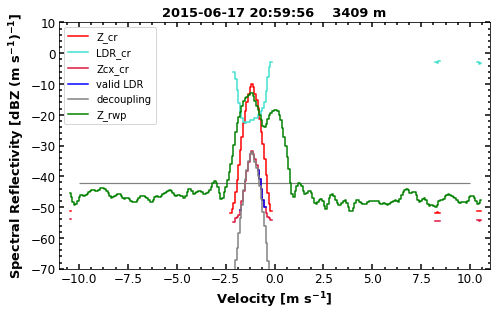

In [8]:
files = {'spec': '/colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4',
         'mmclx': '/colrawi/cloudradar/mmclx/20150617_0000.mmclx',
         'rwp': '/colrawi/windprofiler/nc/wp_20150617_043156.nc.iop',
         'cloudnet': '/colrawi/cloudnet/20150617_lindenberg_categorize.nc'}

print(files['spec'])

dt = datetime.datetime(2015,6,17,20,59,56)
rg = 3400
#rg = 2750

# issue with the calibration
# dt = datetime.datetime(2015,6,17,19,0,0)
# rg = 9331
cr = spectra_mole.mira(files)
spec = cr.get_spectrum(spectra_mole.h.dt_to_ts(dt), rg, range_average=True)

#spectra_mole.vis.plot_spectrum(None, spec)

rwp = spectra_mole.rwp(files)
spec_rwp = rwp.get_spectrum(spectra_mole.h.dt_to_ts(dt), rg,
                            interp_vel=spec['vel'])
print(spec_rwp.keys())
#spec_rwp['specZ'][72] = h.z2lin(-35)
spectra_mole.vis.plot_spectrum([spec, spec_rwp])

print('vel lists identical ', np.all(spec['vel'] == spec_rwp['vel']))

spectra_mole.check_consistency([spec, spec_rwp])

INFO: sigma_b 2.80755752314


---- cloudnet advect -------------------------------------------
cloudnet advect time range  [1434499215 1434499245] [1434585524 1434585554] 2015-06-17 00:00:15 2015-06-17 23:59:14
delta t  29.9996525365
adv_tupel  (12.497830873543434, 0.0021998900920152664, (0.17192457211976064, 12.49664829004949))
None


/mole2/spectra_mole2/spectra_mole/__init__.py:105: RuntimeWarning: invalid value encountered in greater
  h.lin2z(spectrum['specLDRmasked']) > -13, ~spectrum['specLDRmasked_mask'])
/usr/lib/python3/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((256,), False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)
/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


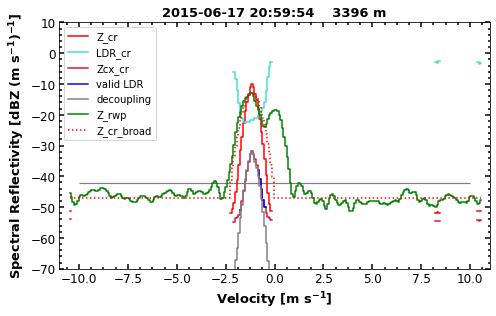

In [9]:
advect = spectra_mole.advection.cloudnet_advect(files['cloudnet'])
adv_tupel = advect.get_pixel(spectra_mole.h.dt_to_ts(dt), rg)
print('adv_tupel ', adv_tupel)

spec_broad = spectra_mole.broaden_spectrum(adv_tupel, spec, cut_thres=spec_rwp['noise_thres'])

#spectra_mole.vis.plot_spectrum(spec_broad, spectrum_rwp=spec_rwp)
spectra_mole.vis.plot_spectrum([spec, spec_rwp, spec_broad])
print(None)

/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)
/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
INFO: check calibration: needs correction
INFO: check calibration: needs correction


---- calibration correct
({'mod_calibration': 1, 'unsecure_calibration': 0}, 1.176730148458268)
---- calibration bias
calibration bias?  ({'mod_calibration': 1, 'unsecure_calibration': 0}, -8.8232700261026302)


(<Figure size 504x324 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f645d076198>)

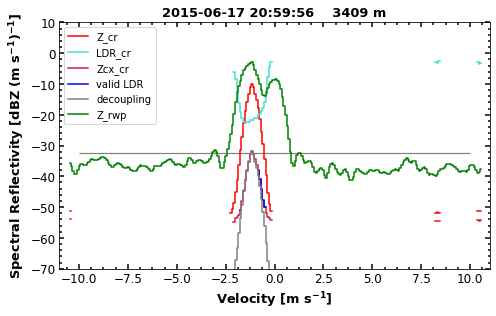

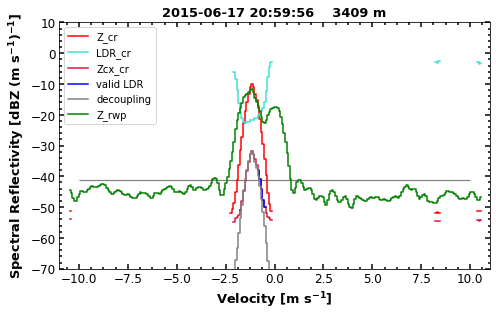

In [11]:
spec_rwp_c = spectra_mole.modify_calibration(spec_rwp, +10)

spectra_mole.vis.plot_spectrum([spec, spec_rwp_c])

print('---- calibration correct')
print(spectra_mole.check_rwp_calibration(spec_rwp, spec_broad))
print('---- calibration bias')
c = spectra_mole.check_rwp_calibration(spec_rwp_c, spec_broad)
print('calibration bias? ', c)
spectra_mole.vis.plot_spectrum([spec, spectra_mole.modify_calibration(spec_rwp_c, c[1])])

In [12]:
print(spectra_mole.estimate_calibration(spec_rwp, spec_broad))

1.10731673663e-15


/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)
/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
INFO: check calibration: needs correction


({'mod_calibration': 1, 'unsecure_calibration': 0}, 1.1767299738973689)


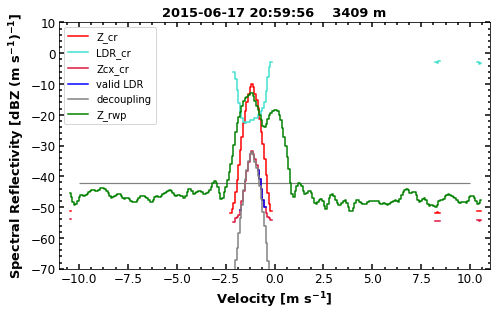

In [23]:
spec_rwp_c = spectra_mole.modify_calibration(spec_rwp, +0)

spectra_mole.vis.plot_spectrum([spec, spec_rwp_c])
c = spectra_mole.check_rwp_calibration(spec_rwp_c, spec_broad)
print(c)